# Introduction to Machine Learning with PyTorch
*by Jonathan Frawley*
<img style="text-align: center;" src="https://www.oreilly.com/library/view/deep-learning-for/9781788295628/assets/43dc9d10-cf03-456b-be23-ec2726f39463.png" width="300"/>

## Before we begin - Format for the meeting

* This meeting is due to run for two hours so do make sure you’re comfortable and have a drink with you.
* We will take a 10 minute break from 11:00-11:10
* As well as speaking you can also contribute to the meeting using the chat panel.
* Start with your camera on so that people can see a friendly face.
* Set your microphone to mute when you are not talking.
* Where possible use a headset to reduce background noise.

# Who am I?
 - 10 years of software development experience in industry (Python and Scala mostly)
 - Research Software Engineer in Advanced Research Computing
 - Part-time PhD in Computer Science in Deep Learning
 - Colleagues from ARC on hand to help

# Icebreaker 

 - Say briefly why you joined this course today in chat
 - If you have questions throughout the day, please put it into chat

# Basic information about today
 - Mixture of lectures and hands on exercises. 
 - All materials are open source, including slides.
 - These will remain available after the course finishes, so don't worry if you do not get through all exercises.
 - If you notice issues, please contact me directly (jonathan.frawley@durham.ac.uk) or raise an issue on the GitHub repository: <https://github.com/jonathanfrawley/machine_learning_course>

# Outline of Day
 1. Introduction to Machine Learning and PyTorch (lecture 10:00-10:40, exercises 10:40-11:00)
 2. Break (11:00-11:10)
 3. Real-world PyTorch (lecture 11:10-11:30, exercises 11:30-11:50)
 4. Wrap up (11:50-12:00)

# Google Colab
<img style="text-align: center;" src="https://miro.medium.com/max/1400/1*8N7xbq6ahVvWkEq_S5EhMA.jpeg" alt="Google Colab logo" width="300"/>
 
 - Google Colab is a free system for running Python notebooks in the cloud
 - It supports a wide variety of Python libraries
 - We will use Google Colab for all exercises
 - Links and instructions are included on the main page
 - If you get the following: **Warning: This notebook was not authored by Google.**, click **Run anyway**
 - [Test](https://colab.research.google.com/github/jonathanfrawley/machine_learning_course/blob/master/example/colab_test.ipynb)

# Slides are all runnable as Colab notebooks
[Example](https://colab.research.google.com/github/jonathanfrawley/machine_learning_course/blob/master/slides/slides_01.ipynb)

# Introduction to Machine Learning and PyTorch

## Traditional AI
 - Rules-based
 - Programmer writes rules to represent the world
 - Simulate how rules behave in different situations

### Unsupervised Machine Learning
 - Learn about dataset in an automated way
 - Clustering

### Supervised Machine Learning
 - Learn how to accomplish a task automatically from data
 - aka - deep learning


# Unsupervised Machine Learning

## Clustering

<img style="text-align: center;" src="https://www.guru99.com/images/1/030819_1030_Unsupervise3.png" alt="Clustering" width="800"/>

### K-Means Clustering
<img style="text-align: center;" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" alt="K-Means Clustering" width="600"/>

In [294]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

n_neighbors = 15

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

In [295]:
# we create an instance of Neighbours Classifier and fit the data.
clf = NearestCentroid(shrink_threshold=None)
clf.fit(X, y)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
clf.centroids_

array([[5.006, 3.428],
       [5.936, 2.77 ],
       [6.588, 2.974]])

<ipython-input-296-3326bd05f6b1>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


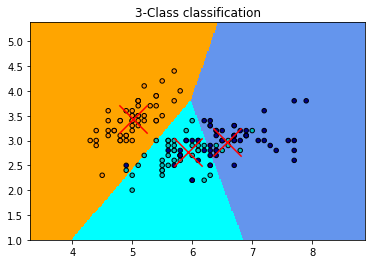

In [296]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.scatter(clf.centroids_[:, 0], clf.centroids_[:, 1],
            c="red", edgecolor='black', marker='x', s=800)

plt.title("3-Class classification")
plt.axis('tight')

plt.show()

# Supervised Machine Learning

# Deep Learning
<img style="text-align: center;" src="https://www.extremetech.com/wp-content/uploads/2015/09/sat-ai-head.jpg" alt="AI" width="300"/>

 - Programs learn solution based on data provided
 - More specifically, programs learn probability distribution of data provided
 - Fundamental ideas have been around for many decades, but in the last 10 years hardware has made it more feasible

<img style="text-align: center;" src="https://miro.medium.com/max/1400/1*_7OPgojau8hkiPUiHoGK_w.png" alt="AI" width="800"/>


## Deep Learning Applications

## Medical Imaging

<img style="text-align: center;" src="https://miro.medium.com/max/1322/1*QbgD1Mkw6l0NRsGMi32yRA.png" alt="Self-driving car" width="800"/>


### Self-Driving Cars

<img style="text-align: center;" src="https://miro.medium.com/proxy/1*q1uVc-MU-tC-WwFp2yXJow.gif" alt="Self-driving car" width="800"/>


### Transformer (GPT-2) Example:
**Betsy was a pig who lived in Devon, she was taken care of by** a local hunter. His wife Sarah lived with her in the same house. When Betsy died, Sarah, her daughter Emily, and her son Paul were left to care for the farm and its pigs. They were all too well versed in the ways of caring for a farm. They taught us all how to care for pigs. Betsy's spirit is alive today in Betsy's Family, and Emily, Chris, and Paul call her Betsy. They frequently speak about Betsy, who they believe is still with them. Betsy passed away in December, 2011. However, Betsy is now with Jesus, and at his right hand. So we sing this song with that and with our thanksgiving of


## Other applications
 - Speech recognition
 - Text-to-speech
 - Customer support
 - Navigation
 - Search results
 - Product listings
 - DeepFakes
 - Face detection

## Deep Learning Challenges

 - Difficult to know how decision is arrived at
 - Generally require a large dataset to come to a good solution
 - Computationally expensive - though new hardware is helping
 - No consensus yet on universally good models for particular applications
 - Open datasets are rare, especially in medical imaging

# Introduction to PyTorch
*based on https://pytorch.org/tutorials/beginner/pytorch_with_examples.html*


# Function fitting with NumPy

As an exercise, how would we do function fitting with NumPy?

In [297]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(200):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = np.square(y_pred - y).sum()
    if t % 200 == 199:
        print(t, loss)
    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

199 2424.2587667314656


In [298]:
def show_result():
    print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
    x_data = np.linspace(-math.pi, math.pi, 2000)
    y_data = a + b*x_data + c*np.power(x_data,2) + d*np.power(x_data,3)
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data, label='prediction')
    ax.plot(x_data, np.sin(x_data), label='correct')
    ax.legend()
    plt.show()

Result: y = 0.1508458169135433 + -0.6476803477320752 x + -0.026023441832469168 x^2 + 0.12066042473654459 x^3


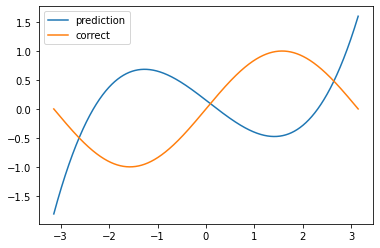

In [299]:
show_result()

In [300]:
# Train for longer
for t in range(2000):
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = np.square(y_pred - y).sum()
    if t % 400 == 399:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

399 471.8345678890867
799 97.64474224503999
1199 25.876176680373362
1599 12.097755731662755
1999 9.449166190345831


Result: y = 0.00475059212288649 + 0.8326955566432287 x + -0.0008195561913920555 x^2 + -0.08991015643404875 x^3


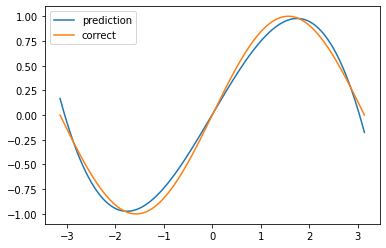

In [301]:
show_result()

# PyTorch: Tensors

How do we do the above with PyTorch?

In [302]:
import random
import torch
import math

In [303]:
dtype = torch.float
device = torch.device("cuda:0")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6

In [304]:
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 500 == 499:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

RuntimeError: CUDA error: unspecified launch failure

In [ ]:
def show_result_pytorch():
    print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
    x_data = np.linspace(-math.pi, math.pi, 2000)
    y_data = a.item() + b.item()*x_data + c.item()*np.power(x_data,2) + d.item()*np.power(x_data,3)
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data, label='prediction')
    ax.plot(x_data, np.sin(x_data), label='correct')
    ax.legend()
    plt.show()

In [ ]:
show_result_pytorch()

# PyTorch: Tensors and autograd

Tensors can also be used to keep track of gradients for us automatically.

In [ ]:
dtype = torch.float
device = torch.device("cuda:0")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6

In [ ]:
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    loss.backward()

    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

# PyTorch: Sequential Models

In [ ]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6

In [ ]:
for t in range(2000):
    # Can call model as function
    y_pred = model(xx)

    loss = loss_fn(y_pred, y)
    if t % 1000 == 999:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad


In [ ]:
# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

# PyTorch: optimization

PyTorch can handle the optimization process as well!

In [ ]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [ ]:
learning_rate = 1e-3
# There are many options here in the torch.optim package
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 400 == 399:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

In [ ]:
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

# PyTorch: Custom nn Modules

In [ ]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'

In [ ]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the nn.Linear
# module which is members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 400 == 399:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
def show_result_module():
    x_data = np.linspace(-math.pi, math.pi, 2000)
    y_data = model.a.item() + model.b.item()*x_data + model.c.item()*np.power(x_data,2) + model.d.item()*np.power(x_data,3)
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data, label='prediction')
    ax.plot(x_data, np.sin(x_data), label='correct')
    ax.legend()
    plt.show()

In [ ]:
print(f'Result: {model.string()}')
show_result_module()

# References
 - NumPy and PyTorch examples are from: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html